In [282]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [283]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [284]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

In [285]:
train.shape, test.shape

((31470, 17), (31262, 16))

In [286]:
train = train.drop([5775,20926],axis = 0)

In [287]:
train_test_data = [train, test]# combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [288]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)

City           Rent
16    港区  213407.354497
4   千代田区  182706.236324
1    中央区  180887.865520
15   渋谷区  171839.786802
17   目黒区  145674.389052
10   新宿区  130573.957482
9    文京区  128562.070628
5    台東区  127625.944206
14   江東区  126217.110743
6    品川区  124609.473270
19   荒川区  116819.304348
7    墨田区  116201.346535
0   世田谷区  113781.270261
21   豊島区  110916.884343
8    大田区  106981.675000
2    中野区  101578.398018
3     北区   99506.602871
11   杉並区   97708.174675
18   練馬区   92724.943493
12   板橋区   90003.879310
13  江戸川区   86592.302585
22   足立区   85872.540849
20   葛飾区   79114.657591

In [289]:
for dataset in train_test_data:
    dataset['Station'] = dataset['Access'].str.extract('(\w+?駅)').fillna('三軒茶屋駅')
    dataset['Line'] = dataset['Access'].str.extract('(\w+?線)').fillna('山手')
    dataset['MinWalk'] = dataset['Access'].str.extract('((?<=徒歩).+?(?=分))').fillna('0').astype(int)
    dataset['MinBus'] = dataset['Access'].str.extract('((?<=バス\().+?(?=分\)))').fillna('0').astype(int)

In [290]:
for dataset in train_test_data:
    dataset['StationCount'] = dataset['Access'].map(lambda x: x.count('駅'))
    dataset['LineCount'] = dataset['Access'].map(lambda x: x.count('線'))

In [291]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])').fillna('2').astype(int)
    dataset['K'] = dataset['Type'].apply(lambda x: 'K' in x)
    dataset['L'] = dataset['Type'].apply(lambda x: 'L' in x)
    dataset['D'] = dataset['Type'].apply(lambda x: 'D' in x)
    dataset['S'] = dataset['Type'].apply(lambda x: 'S' in x)

In [292]:
 for dataset in train_test_data:
    dataset['NewConstr'] = (dataset['Age']=='新築')
    dataset['Year'] = dataset['Age'].str.extract('([0-9]*年)')
    dataset['Year'] = dataset['Year'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['Month'] = dataset['Age'].str.extract('([0-9]*ヶ月)')
    dataset['Month'] = dataset['Month'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['Month'] = dataset['Year']*12+dataset['Month']

In [293]:
for dataset in train_test_data:
    dataset['Direction'].fillna('南',inplace=True)

In [294]:
for dataset in train_test_data:
    dataset['Area'] = dataset['Area'].str.extract('(-?\d+\.?\d*)').astype(float)

In [295]:
train[['Area', 'Rent']].groupby(['Area'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Area       Rent
5729  217.29  2500000.0
5702  151.81  1800000.0
5737  341.30  1660000.0
5733  232.01  1450000.0
5680  138.99  1390000.0
5714  167.99  1300000.0
5659  125.00  1300000.0
5731  223.71  1300000.0
5709  163.62  1200000.0
5730  221.30  1120000.0

In [296]:
for dataset in train_test_data:
    dataset['FloorTh'] = dataset['Floor'].str.extract(r'(\d+)?階\W', expand=False).fillna('0').astype(int)
    dataset['FloorNum'] = dataset['Floor'].str.extract(r'(\d+)?階建', expand=False).fillna('0').astype(int)
    dataset['UndergroundTh'] = dataset['Floor'].str.extract(r'^地下(\d+)?階', expand=False).fillna('0').astype(int)
    dataset['UndergroundNum'] = dataset['Floor'].str.extract(r'（地下(\d+)?階）', expand=False).fillna('0').astype(int)
    dataset['House'] = dataset['Floor'].str.match('((?!/)^.\d*階建)').astype(bool)

In [297]:
for dataset in train_test_data:
    dataset['warmseat'] = dataset['Bath'].str.extract('(温水洗浄便座)')
    dataset['shower'] = dataset['Bath'].str.extract('(シャワー)')
    dataset['dryer'] = dataset['Bath'].str.extract('(浴室乾燥機)')
    dataset['bathtoilet'] = dataset['Bath'].str.extract('(バス・トイレ別)')
    dataset['memorial'] = dataset['Bath'].str.extract('(追焚機能)')
    dataset['washstand'] = dataset['Bath'].str.extract('(洗面台独立)')
    dataset['dressing'] = dataset['Bath'].str.extract('(脱衣所)')
    dataset['toilet'] = dataset['Bath'].str.extract('(専用トイレ|トイレなし|共同トイレ)').fillna('トイレなし')
    dataset['bath'] = dataset['Bath'].str.extract('(専用バス|バスなし|共同バス)').fillna('バスなし')


In [298]:
for dataset in train_test_data:
    dataset['warmseat'] = dataset['warmseat'].apply(lambda x: True if x == '温水洗浄便座' else False)
    dataset['shower'] = dataset['shower'].apply(lambda x: True if x == 'シャワー' else False)
    dataset['dryer'] = dataset['dryer'].apply(lambda x: True if x == '浴室乾燥機' else False)
    dataset['bathtoilet'] = dataset['bathtoilet'].apply(lambda x: True if x == 'バス・トイレ別' else False)
    dataset['memorial'] = dataset['memorial'].apply(lambda x: True if x == '追焚機能' else False)
    dataset['washstand'] = dataset['washstand'].apply(lambda x: True if x == '洗面台独立' else False)
    dataset['dressing'] = dataset['dressing'].apply(lambda x: True if x == '脱衣所' else False)

In [299]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['Kitchen'].str.extract('(ガスコンロ)')
    dataset['2stovetops'] = dataset['Kitchen'].str.extract('(コンロ2口)')
    dataset['systemkitchen'] = dataset['Kitchen'].str.extract('(システムキッチン)')
    dataset['hotwatersupply'] = dataset['Kitchen'].str.extract('(給湯)')
    dataset['separatekitchen'] = dataset['Kitchen'].str.extract('(独立キッチン)')
    dataset['3stovetops'] = dataset['Kitchen'].str.extract('(コンロ3口)')
    dataset['IH'] = dataset['Kitchen'].str.extract('(IHコンロ)')
    dataset['1stovetop'] = dataset['Kitchen'].str.extract('(コンロ1口)')
    dataset['fridge'] = dataset['Kitchen'].str.extract('(冷蔵庫あり)')
    dataset['installedstove'] = dataset['Kitchen'].str.extract('(コンロ設置可)')
    dataset['counterkitchen'] = dataset['Kitchen'].str.extract('(カウンターキッチン)')
    dataset['Lshapekitchen'] = dataset['Kitchen'].str.extract('(L字キッチン)')
    dataset['unknown'] = dataset['Kitchen'].str.extract('(口数不明)')
    dataset['electricstove'] = dataset['Kitchen'].str.extract('(電気コンロ)')
    dataset['morethan4stoves'] = dataset['Kitchen'].str.extract('(コンロ4口以上)')

In [300]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['gasstove'].apply(lambda x: True if x == 'ガスコンロ' else False)
    dataset['2stovetops'] = dataset['2stovetops'].apply(lambda x: 2 if x == 'コンロ2口' else 1)
    dataset['systemkitchen'] = dataset['systemkitchen'].apply(lambda x: True if x == 'システムキッチン' else False)
    dataset['hotwatersupply'] = dataset['hotwatersupply'].apply(lambda x: True if x == '給湯' else False)
    dataset['separatekitchen'] = dataset['separatekitchen'].apply(lambda x: True if x == '独立キッチン' else False)
    dataset['3stovetops'] = dataset['3stovetops'].apply(lambda x: 3 if x == 'コンロ3口' else 1)
    dataset['IH'] = dataset['IH'].apply(lambda x: True if x == 'IHコンロ' else False)
    dataset['1stovetop'] = dataset['1stovetop'].apply(lambda x: 1 if x == 'コンロ1口' else 1)
    dataset['fridge'] = dataset['fridge'].apply(lambda x: True if x == '冷蔵庫あり' else False)
    dataset['installedstove'] = dataset['installedstove'].apply(lambda x: True if x == 'コンロ設置可' else False)
    dataset['counterkitchen'] = dataset['counterkitchen'].apply(lambda x: True if x == 'カウンターキッチン' else False)
    dataset['Lshapekitchen'] = dataset['Lshapekitchen'].apply(lambda x: True if x == 'L字キッチン' else False)
    dataset['unknown'] = dataset['unknown'].apply(lambda x: True if x == '口数不明' else False)
    dataset['electricstove'] = dataset['electricstove'].apply(lambda x: True if x == '電気コンロ' else False)
    dataset['morethan4stoves'] = dataset['morethan4stoves'].apply(lambda x: 4 if x == 'コンロ4口以上' else 1)

In [301]:
for dataset in train_test_data:
  dataset['stove'] = dataset['Kitchen'].isna()*(-1)
  dataset['stove'] = dataset['stove'] + (dataset['stove']+1)*dataset[['2stovetops','3stovetops','1stovetop','morethan4stoves']].max(axis=1)

In [302]:
for dataset in train_test_data:            #replace NaN with largest type which is 2
  dataset['stove'] = dataset['stove'].replace(-1,2)

In [303]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['Internet'].str.extract('(インターネット使用料無料)')
    dataset['cable'] = dataset['Internet'].str.extract('(有線放送)')
    dataset['csantenna'] = dataset['Internet'].str.extract('(CSアンテナ)')
    dataset['catv'] = dataset['Internet'].str.extract('(CATV)')
    dataset['opticalfiber'] = dataset['Internet'].str.extract('(光ファイバー)')
    dataset['internetcompatible'] = dataset['Internet'].str.extract('(インターネット対応)')
    dataset['bsantenna'] = dataset['Internet'].str.extract('(BSアンテナ)')
    dataset['highspeed'] = dataset['Internet'].str.extract('(高速インターネット)')

In [304]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['freeusage'].apply(lambda x: True if x == 'インターネット使用料無料' else False)
    dataset['cable'] = dataset['cable'].apply(lambda x: True if x == '有線放送' else False)
    dataset['csantenna'] = dataset['csantenna'].apply(lambda x: True if x == 'CSアンテナ' else False)
    dataset['catv'] = dataset['catv'].apply(lambda x: True if x == 'CATV' else False)
    dataset['opticalfiber'] = dataset['opticalfiber'].apply(lambda x: True if x == '光ファイバー' else False)
    dataset['internetcompatible'] = dataset['internetcompatible'].apply(lambda x: True if x == 'インターネット対応' else False)
    dataset['bsantenna'] = dataset['bsantenna'].apply(lambda x: True if x == 'BSアンテナ' else False)
    dataset['highspeed'] = dataset['highspeed'].apply(lambda x: True if x == '高速インターネット' else False)

In [305]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['Surround'].str.extract('(レンタルビデオ)')
    dataset['park'] = dataset['Surround'].str.extract('(公園)')
    dataset['drugstore'] = dataset['Surround'].str.extract('(ドラッグストア)')
    dataset['library'] = dataset['Surround'].str.extract('(図書館)')
    dataset['primaryschool'] = dataset['Surround'].str.extract('(小学校)')
    dataset['hospital'] = dataset['Surround'].str.extract('(病院)')
    dataset['department'] = dataset['Surround'].str.extract('(デパート)')
    dataset['generalhospital'] = dataset['Surround'].str.extract('(総合病院)')
    dataset['monthlyparkinglot'] = dataset['Surround'].str.extract('(月極駐車場)')
    dataset['restaurant'] = dataset['Surround'].str.extract('(飲食店)')
    dataset['school'] = dataset['Surround'].str.extract('(学校)')
    dataset['konbini'] = dataset['Surround'].str.extract('(コンビニ)')
    dataset['bank'] = dataset['Surround'].str.extract('(銀行)')
    dataset['cleaning'] = dataset['Surround'].str.extract('(クリーニング)')
    dataset['kindergarten'] = dataset['Surround'].str.extract('(幼稚園・保育園)')
    dataset['coinparking'] = dataset['Surround'].str.extract('(コインパーキング)')
    dataset['univ'] = dataset['Surround'].str.extract('(大学)')
    dataset['supermarket'] = dataset['Surround'].str.extract('(スーパー)')
    dataset['postoffice'] = dataset['Surround'].str.extract('(郵便局)')
    dataset['SurroundDistance'] = dataset['Surround'].str.extract('([0-9]*m)')
    dataset['SurroundDistance'] = dataset['SurroundDistance'].str.extract('([0-9]*)').fillna('350').astype(int)

In [306]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['rentalvideo'].apply(lambda x: True if x == 'レンタルビデオ' else False)
    dataset['park'] = dataset['park'].apply(lambda x: True if x == '公園' else False)
    dataset['drugstore'] = dataset['drugstore'].apply(lambda x: True if x == 'ドラッグストア' else False)
    dataset['library'] = dataset['library'].apply(lambda x: True if x == '図書館' else False)
    dataset['primaryschool'] = dataset['primaryschool'].apply(lambda x: True if x == '小学校' else False)
    dataset['hospital'] = dataset['hospital'].apply(lambda x: True if x == '病院' else False)
    dataset['department'] = dataset['department'].apply(lambda x: True if x == 'デパート' else False)
    dataset['generalhospital'] = dataset['generalhospital'].apply(lambda x: True if x == '総合病院' else False)
    dataset['monthlyparkinglot'] = dataset['monthlyparkinglot'].apply(lambda x: True if x == '月極駐車場' else False)
    dataset['restaurant'] = dataset['restaurant'].apply(lambda x: True if x == '飲食店' else False)
    dataset['school'] = dataset['school'].apply(lambda x: True if x == '学校' else False)
    dataset['konbini'] = dataset['konbini'].apply(lambda x: True if x == 'コンビニ' else False)
    dataset['bank'] = dataset['bank'].apply(lambda x: True if x == '銀行' else False)
    dataset['cleaning'] = dataset['cleaning'].apply(lambda x: True if x == 'クリーニング' else False)
    dataset['kindergarten'] = dataset['kindergarten'].apply(lambda x: True if x == '幼稚園・保育園' else False)
    dataset['coinparking'] = dataset['coinparking'].apply(lambda x: True if x == 'コインパーキング' else False)
    dataset['univ'] = dataset['univ'].apply(lambda x: True if x == '大学' else False)
    dataset['supermarket'] = dataset['supermarket'].apply(lambda x: True if x == 'スーパー' else False)
    dataset['postoffice'] = dataset['postoffice'].apply(lambda x: True if x == '郵便局' else False)

In [307]:
for dataset in train_test_data:
    dataset['concrete'] = dataset['Material'].str.extract('(RC（鉄筋コンクリート）|鉄骨造|SRC（鉄骨鉄筋コンクリート）|'
                                                          '軽量鉄骨|ALC（軽量気泡コンクリート）|'
                                                          'その他|PC（プレキャスト・コンクリート（鉄筋コンクリート））|'
                                                          'HPC（プレキャスト・コンクリート（重量鉄骨））|ブロック)')
    dataset['wooden'] = dataset['Material'].str.extract('(木造)')

In [308]:
 for dataset in train_test_data:
    dataset['concrete'] = dataset['concrete'].apply(lambda x: True if x == 'RC（鉄筋コンクリート）|鉄骨造|SRC（鉄骨鉄筋コンクリート）|'
                                                          '軽量鉄骨|ALC（軽量気泡コンクリート）|'
                                                          'その他|PC（プレキャスト・コンクリート（鉄筋コンクリート））|'
                                                          'HPC（プレキャスト・コンクリート（重量鉄骨））|ブロック' else False)
    dataset['wooden'] = dataset['wooden'].apply(lambda x: True if x == '木造' else False)

In [309]:
for dataset in train_test_data:
    #dataset['Contract'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')
    dataset['Contract'] = dataset['Contract'].str.replace('2019年', '0年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2020年', '1年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2021年', '2年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2022年', '3年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2023年', '4年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2024年', '5年', regex=True)

In [310]:
for dataset in train_test_data:
    dataset['YearContract'] = dataset['Contract'].str.extract('([0-9]*年間)')
    dataset['YearContract'] = dataset['YearContract'].str.extract('([0-9]*)').fillna('2').astype(int)
    dataset['MonthContract'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')
    dataset['MonthContract'] = dataset['MonthContract'].str.extract('([0-9]*)').fillna('0').astype(int)
    dataset['MonthContract'] = dataset['YearContract']*12+dataset['MonthContract']
    dataset['fixedterm'] = dataset['Contract'].str.extract('(定期借家)')
    dataset['fixedterm'] = dataset['fixedterm'].apply(lambda x: True if x == '定期借家' else False)

In [311]:
for dataset in train_test_data:
  dataset['Parking'] = dataset['Parking'].str.replace('駐輪場','a駐輪場')
  dataset['Parking'] = dataset['Parking'].str.replace('駐車場','a駐車場')
  dataset['Parking'] = dataset['Parking'].str.replace('バイク置き場','aバイク置き場')
  dataset['Parking'] = dataset['Parking'] + 'a'

In [312]:
for dataset in train_test_data:
  temp = dataset['Parking'].str.extract('(a駐車場.*?a)')[0]
  dataset['carparking'] = temp.str.extract('(無|空無|近隣|空有)').fillna('無')
  dataset['carparking_distance'] = temp.str.extract('距離(\d*)m').fillna('220').astype(int)
  dataset['carparking_price'] = temp.str.extract('(\d*,\d*)')[0].str.replace(',','').fillna('28558').astype(int)
  temp = dataset['Parking'].str.extract('(a駐輪場.*?a)')[0]
  dataset['bikeparking'] = temp.str.extract('(無|空無|近隣|空有)').fillna('無')
  dataset['bikeparking_distance'] = temp.str.extract('距離(\d*)m').fillna('1').astype(int)
  dataset['bikeparking_price'] = temp.str.extract('(\d*,\d*)')[0].str.replace(',','').fillna('2931').astype(int)
  temp = dataset['Parking'].str.extract('(aバイク置き場.*?a)')[0]
  dataset['motorparking'] = temp.str.extract('(無|空無|近隣|空有)').fillna('無')
  dataset['motorparking_distance'] = temp.str.extract('距離(\d*)m').fillna('99').astype(int)
  dataset['motorparking_price'] = temp.str.extract('(\d*,\d*)')[0].str.replace(',','').fillna('4000').astype(int)

In [313]:
cardistance_mean = np.nanmean(train['carparking_distance'].astype(float), axis = 0) 
bikedistance_mean = np.nanmean(train['bikeparking_distance'].astype(float), axis = 0) 
motordistance_mean = np.nanmean(train['motorparking_distance'].astype(float), axis = 0) 

carprice_mean = np.nanmean(train['carparking_price'].astype(float), axis = 0) 
bikeprice_mean = np.nanmean(train['bikeparking_price'].astype(float), axis = 0) 
motorprice_mean = np.nanmean(train['motorparking_price'].astype(float), axis = 0) 

In [314]:
cardistance_mean

220.06098258548366

In [315]:
bikedistance_mean

1.0

In [316]:
motordistance_mean

99.00012711325792

In [317]:
carprice_mean

28558.20068005593

In [318]:
bikeprice_mean

2931.001144019321

In [319]:
motorprice_mean

4000.0157620439813

In [320]:
train.shape, test.shape

((31468, 104), (31262, 103))

In [321]:
facility_type = train['Facility'].dropna().str.split('\t').sum()
facility_type = [n.replace('／', '') for n in facility_type]
facility_type = list(set(facility_type))

In [322]:
facility_type = facility_type[1:]

In [323]:
def one_hot(arr,col):
  for i in arr:
    train[i] = (train[col].str.find(i)!=-1)
    test[i] = (test[col].str.find(i)!=-1)

In [324]:
one_hot(facility_type,'Facility')

In [325]:
train = train.drop(['2stovetops','3stovetops','1stovetop','morethan4stoves','Location','id','Access','Type','Floor','Bath','Kitchen','Internet','Facility','Surround','Parking','Age','Contract'],axis=1)

In [326]:
test = test.drop(['2stovetops','3stovetops','1stovetop','morethan4stoves','Location','id','Access','Type','Floor','Bath','Kitchen','Internet','Facility','Surround','Parking','Age','Contract'],axis=1)

In [327]:
train.shape, test.shape

((31468, 129), (31262, 128))

In [328]:
def makeCountFull(train, test, categorical_features=None, report=True):
    add_cols = categorical_features
    if report:
        print('add_cols: ', add_cols)
    for add_col in add_cols:
        train[add_col + '_le'] = train[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
        test[add_col + '_le'] = test[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
    return train, test


In [329]:
from sklearn.preprocessing import LabelEncoder
cat_features = ['Direction','Material','City','Station','Line','bath','toilet','carparking','bikeparking','motorparking']
train, test = makeCountFull(train, test, cat_features)
cat_cols = ['Direction','Material','City','Station','Line','bath','toilet','carparking','bikeparking','motorparking']
for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    le = LabelEncoder()
    le.fit(list(train[col])+list(test[col]))
    train[col] = le.transform(train[col])
    test[col]    = le.transform(test[col])    
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    train = train.drop(col,axis=1)
    test = test.drop(col,axis=1)


add_cols:  ['Direction', 'Material', 'City', 'Station', 'Line', 'bath', 'toilet', 'carparking', 'bikeparking', 'motorparking']


In [330]:
train.shape, test.shape

((31468, 129), (31262, 128))

In [331]:
#let's create this function to make it easier and clean to fit the model and use the cross_val_score and obtain results
import time #implementing in this function the time spent on training the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def modelfit(alg, dtrain, target, only_predict = False):
    X_train, X_valid, y_train, y_valid = train_test_split(dtrain, target, random_state=42,test_size=0.2)
    #Fit the algorithm on the data
    time_start = time.perf_counter() #start counting the time
    if not only_predict:
        alg.fit(X_train, y_train,eval_set =[(X_train,y_train,'train'),(X_valid,y_valid,'test')] , eval_metric=["rmse","rmse"],verbose=True,early_stopping_rounds=500)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(alg, X_train,y_train, cv=kfolds, scoring='neg_mean_squared_error',verbose=1)
    cv_score = np.sqrt(-cv_score)

    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(y_train, dtrain_predictions))))
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

In [332]:
#let's create this function to make it easier and clean to fit the model and use the cross_val_score and obtain results
import time #implementing in this function the time spent on training the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def cross(alg, dtrain, target, only_predict = False):
    time_start = time.perf_counter() #start counting the time
        
    #Predict training set:
    
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_score = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_mean_squared_error',verbose=1)
    cv_score = np.sqrt(-cv_score)

    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

In [333]:
# Plot feature importance
def plot_feature_importance(model, df):
    feature_importance = model.feature_importances_[:30]
    # make importances relative to max importance
    plt.figure(figsize=(20, 20)) #figure size
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) #making it a percentage relative to the max value
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx], fontsize=15) #used train_drop here to show the name of each feature instead of our train_prepared 
    plt.xlabel('Relative Importance', fontsize=20)
    plt.ylabel('Features', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

In [334]:
X = train.drop([train.columns[0],'Rent'], axis=1)
y = train['Rent']
X_test = test.drop(test.columns[0],axis=1)

In [335]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'num_leaves': (5, 256,),
        'max_bin': (32, 512),
        'bagging_fraction': (0.7, 1.0),
        'feature_fraction':(0.2,0.9),
        'bagging_freq':(0,100),
        'feature_fraction_seed':(0,100),
        'bagging_seed':(0,100),
        'min_data_in_leaf':(0,100),
        'min_sum_hessian_in_leaf':(0,100),
        }

bayes=BayesSearchCV(lgb.LGBMRegressor(),params,n_iter=10,scoring='neg_mean_squared_error',cv=10,random_state=42)
res=bayes.fit(X,y)
print(res.best_params_)

{'bagging_fraction': 0.9866433958929786, 'bagging_freq': 70, 'bagging_seed': 87, 'feature_fraction': 0.4910747613056175, 'feature_fraction_seed': 38, 'max_bin': 133, 'min_data_in_leaf': 0, 'min_sum_hessian_in_leaf': 37, 'num_leaves': 154}


In [339]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=154,
                              learning_rate=0.05, n_estimators=3000,
                              max_bin = 133, bagging_fraction = 0.9866433958929786,
                              bagging_freq = 70, feature_fraction = 0.4910747613056175,
                              feature_fraction_seed=38, bagging_seed=87,
                              min_data_in_leaf =65, min_sum_hessian_in_leaf = 42)
modelfit(model_lgb, X, y)

[1]	training's rmse: 71136.8	training's l2: 5.06044e+09	valid_1's rmse: 68970.4	valid_1's l2: 4.75692e+09
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 68578.3	training's l2: 4.70298e+09	valid_1's rmse: 66454.6	valid_1's l2: 4.41622e+09
[3]	training's rmse: 66485.6	training's l2: 4.42034e+09	valid_1's rmse: 64428	valid_1's l2: 4.15096e+09
[4]	training's rmse: 64204.9	training's l2: 4.12227e+09	valid_1's rmse: 62193.5	valid_1's l2: 3.86803e+09
[5]	training's rmse: 61942	training's l2: 3.83681e+09	valid_1's rmse: 59970.2	valid_1's l2: 3.59642e+09
[6]	training's rmse: 59772.9	training's l2: 3.5728e+09	valid_1's rmse: 57883.3	valid_1's l2: 3.35048e+09
[7]	training's rmse: 57757.4	training's l2: 3.33591e+09	valid_1's rmse: 55925.6	valid_1's l2: 3.12767e+09
[8]	training's rmse: 55931.5	training's l2: 3.12834e+09	valid_1's rmse: 54134	valid_1's l2: 2.93049e+09
[9]	training's rmse: 54352.5	training's l2: 2.95419e+09	valid_1's rmse: 52598.1	valid_1's l2: 2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished


c:\users\anhnq\.virtualenvs\project\lib\site-packages\ipykernel_launcher.py:1: UserWarning: more than one metric available, picking one to plot.
  """Entry point for launching an IPython kernel.


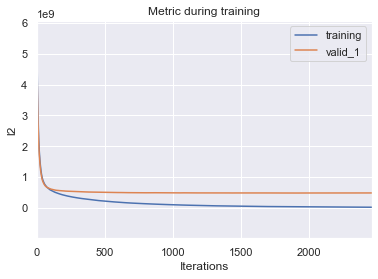

In [340]:
lgb.plot_metric(model_lgb.evals_result_)

Training until validation scores don't improve for 200 rounds.
[200]	training's rmse: 23473.1	valid_1's rmse: 32575.4
[400]	training's rmse: 16330.7	valid_1's rmse: 26908.9
[600]	training's rmse: 13732.5	valid_1's rmse: 25222.2
[800]	training's rmse: 12022	valid_1's rmse: 24286.9
[1000]	training's rmse: 10671.5	valid_1's rmse: 23746.2
[1200]	training's rmse: 9594.45	valid_1's rmse: 23254.1
[1400]	training's rmse: 8704.6	valid_1's rmse: 22878.3
[1600]	training's rmse: 7931.23	valid_1's rmse: 22524.8
[1800]	training's rmse: 7259.48	valid_1's rmse: 22280.2
[2000]	training's rmse: 6687.87	valid_1's rmse: 22064.7
[2200]	training's rmse: 6176.61	valid_1's rmse: 21872
[2400]	training's rmse: 5723.58	valid_1's rmse: 21674.8
[2600]	training's rmse: 5306.43	valid_1's rmse: 21535.7
[2800]	training's rmse: 4937.86	valid_1's rmse: 21405.4
[3000]	training's rmse: 4609.1	valid_1's rmse: 21279
[3200]	training's rmse: 4311.13	valid_1's rmse: 21171.7
[3400]	training's rmse: 4040.28	valid_1's rmse: 21072

KeyboardInterrupt: 